# ConvexGating tutorial

### Load necessary packages for tutorial
Make sure that the required packages are properly installed. For the installation of **ConvexGating** see https://github.com/buettnerlab/convex_gating#installation.

In [1]:
import convexgating as cg
import scanpy as sc
import anndata as ann
import pandas as pd
from sklearn.datasets import make_blobs

## Generate toy data set
We generate a toy data set with 5000 observations and 12 features originating from 3 cluster centers. Input file format for **ConvexGating** is **anndata**, see https://anndata.readthedocs.io/.

In [2]:
n_features = 12
X,y = make_blobs(5000, n_features=n_features, centers=3,cluster_std = 3)

var_names = []
for j in range(1,n_features+1):
    var_names.append('feature_' +str(j))
    
adata = ann.AnnData(X=X)
adata.var.index = var_names    

## Clustering
At first, apply clustering to obtain labels in an unsupervised fashion. Our method of choice is the **louvain algorithm**. Install the louvain package using pip via **pip install louvain**.

In [3]:
sc.pp.neighbors(adata)
sc.tl.louvain(adata)

## Apply ConvexGating
Find gating strategies for all clusters via **ConvexGating**. As input, **ConvexGating** requires an **anndata object** (adata), a **list** of **cluster identifiers** (cluster_numbers) and the **column name** for the **column** with **label information** in **adata.obs** (louvain). If necessary, **model hyperparameters** can be adjusted in convex_gating/convex_gating/hyperparameters.py.

           hierarchy_1  hierarchy_2  hierarchy_3  hierarchy_4  hierarchy_5
f1            0.896455     0.961987     0.961668     0.961031     0.960074
recall        0.954464     0.940084     0.939485     0.938286     0.936489
precision     0.845093     0.984934     0.984925     0.984906     0.984877


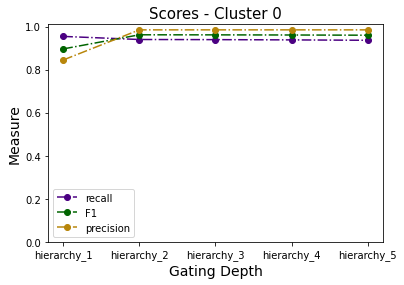

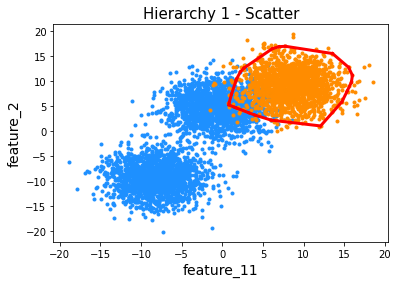

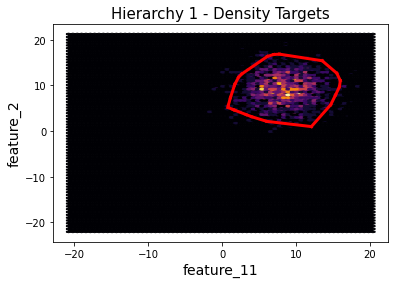

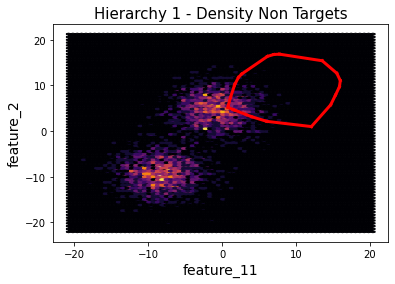

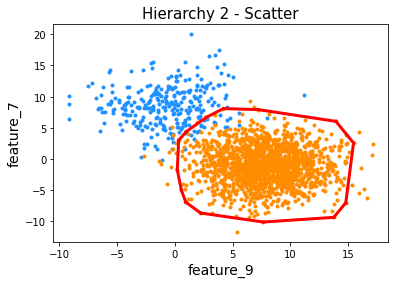

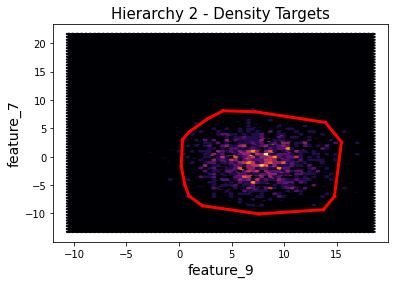

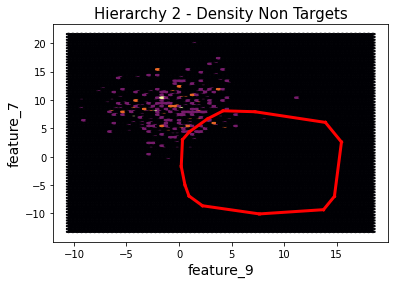

           hierarchy_1
f1              0.9997
recall          0.9994
precision       1.0000


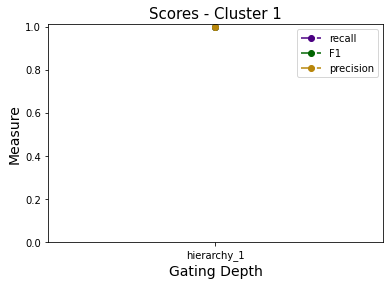

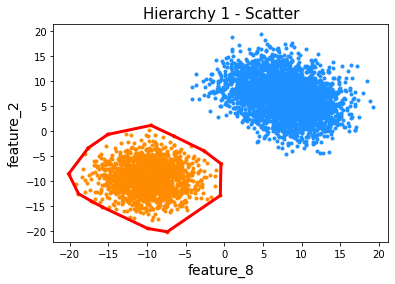

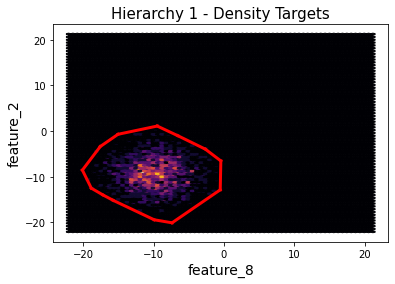

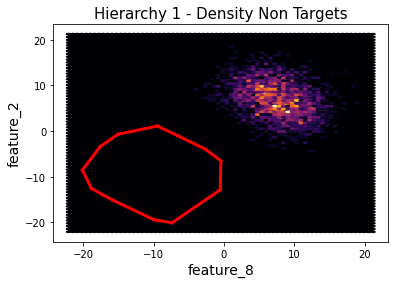

           hierarchy_1  hierarchy_2  hierarchy_3  hierarchy_4  hierarchy_5
f1            0.920626     0.949110     0.948454     0.949451     0.948460
recall        0.936937     0.912913     0.911712     0.908108     0.906306
precision     0.904872     0.988296     0.988281     0.994737     0.994726


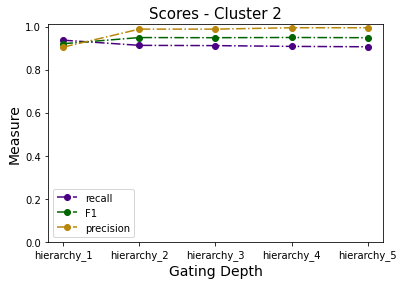

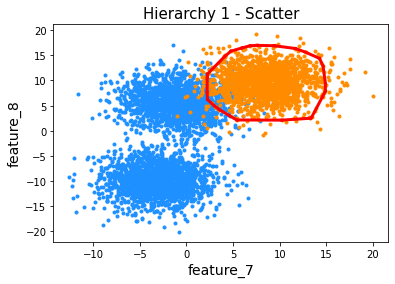

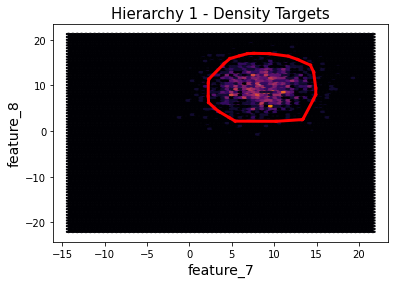

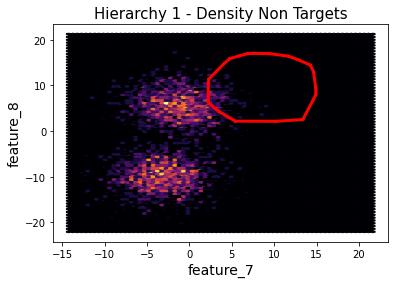

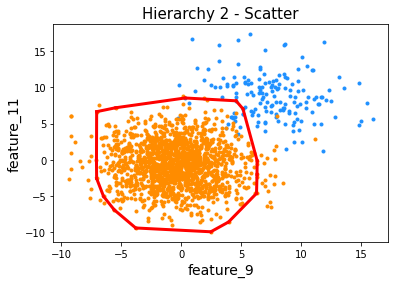

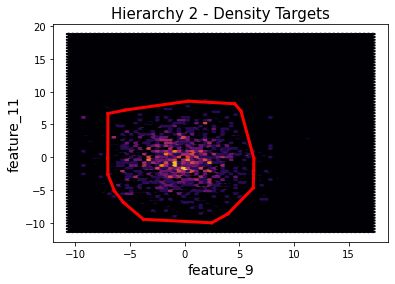

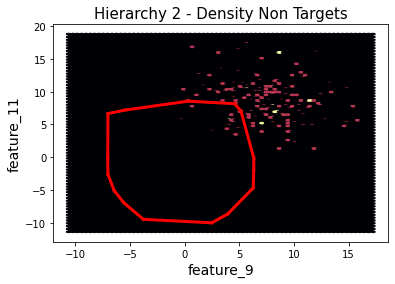

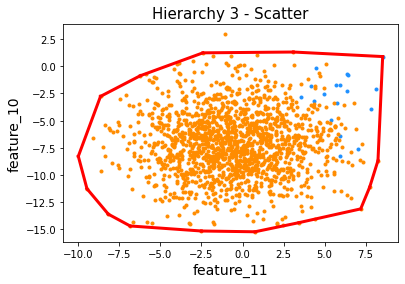

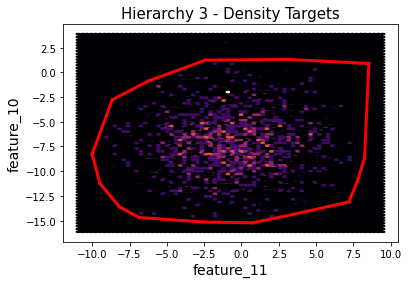

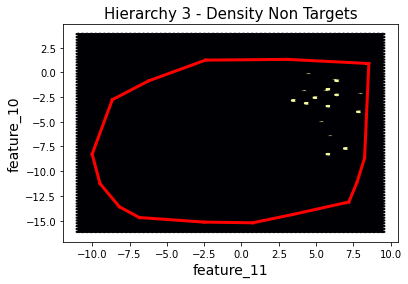

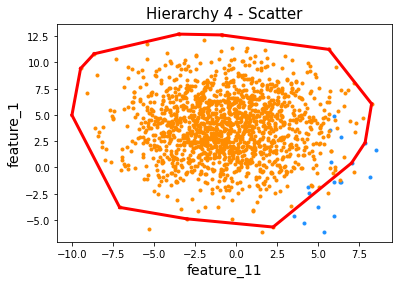

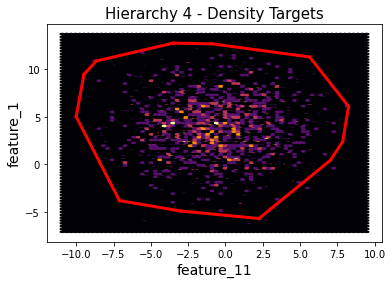

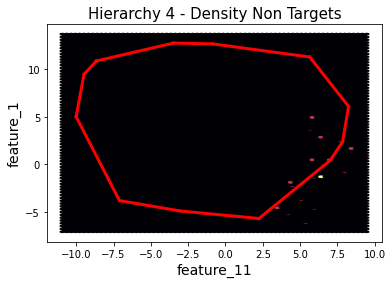

In [4]:
cluster_numbers = pd.unique(adata.obs['louvain'])
cg.tools.gating_strategy(adata,cluster_numbers,cluster_string = 'louvain')